# Imports

In [4]:
%matplotlib inline

import numpy as np
from astropy.table import Table
from astropy.table import Column
from matplotlib import pyplot as plt

# Synthetic Fluxes

## Input parameters

Input fake EWs and model parameters for generating the synthetic fluxes

In [2]:
ew = Table.read('/Users/thsyu/Software/Yp/test_data/synthetic/synthetic_flux-EWs', format='ascii', delimiter=' ')
input_param = Table.read('/Users/thsyu/Software/Yp/test_data/synthetic/synthetic_flux-input_params', format='ascii', delimiter=' ')

In [3]:
input_param

y+,Te,log(ne),c(Hb),aH,aHe,tauHe,log(xi)
float64,int64,float64,float64,float64,float64,float64,float64
0.088,16500,2.2,0.1,3.0,0.3,0.5,-2.0
0.088,16500,0.0,0.0,0.0,0.0,0.0,0.0
0.088,16500,2.2,0.1,3.0,0.3,0.5,0.0
0.088,16500,2.2,0.1,3.0,0.3,0.0,-2.0
0.088,16500,2.2,0.1,3.0,0.0,0.5,-2.0
0.088,16500,2.2,0.1,0.0,0.3,0.5,-2.0
0.088,16500,2.2,0.0,3.0,0.3,0.5,-2.0
0.088,16500,0.0,0.1,3.0,0.3,0.5,-2.0


## Load tables

In [5]:
erik = Table.read('/Users/thsyu/Software/Yp/test_data/synthetic/SyntheticFluxes.DAT', format='ascii', delimiter='\t')
A2002 = Table.read('/Users/thsyu/Software/Yp/test_data/synthetic/synthetic_A2002', format='ascii', delimiter=' ')

In [6]:
erik[0:3]

Synthetic,H8+HeI3889,HeI4026,Hd4102,Hg4340,HeI4471,Hb4861,HeI5876,Ha6563,HeI6678,HeI7065,HeI10830
str4,float64,float64,float64,float64,float64,int64,float64,float64,float64,float64,float64
Syn1,0.1669517,0.014090856,0.2234386,0.4334171,0.034539614,1,0.1047526,3.397364,0.030201202,0.0285201,3.724002
Syn2,0.1137611,0.0012994061,0.1894054,0.3793492,0.002675869,1,0.0070080128,5.467042,0.0019774013,0.0015783558,0.2149278
Syn3,0.093445748,0.0010515138,0.1673789,0.3567378,0.0025774788,1,0.0078170402,5.924242,0.0022537301,0.0021282798,0.370975


In [8]:
A2002[0:3]

Synthetic,H8+HeI3889,HeI4026,Hd4102,Hg4340,HeI4471,Hb4861,HeI5876,Ha6563,HeI6678,HeI7065,HeI10830
str4,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
syn1,0.16545744103595017,0.014059821320586642,0.2241429956962748,0.4345553223007758,0.034465278658172414,1.0,0.10453450904337694,3.3806160543288972,0.030138758822431323,0.028466034100449324,3.5790845463046463
syn2,0.07737976187451923,0.0013019128055372089,0.19249755206925365,0.38582056050377966,0.0026810313894137954,1.0,0.007021532311556375,5.364570420440908,0.001981216328891534,0.0015814005981012785,0.15167017488048204
syn3,0.060414402521881336,0.0010526478362119743,0.17012359243827377,0.362911850100966,0.0025803884826648823,1.0,0.00782641701092404,5.808556027232206,0.002256465323218143,0.002131229730316657,0.262056559607676


## Run comparisons

### Synthetic 1 (all parameters)

In [ ]:
synth_idx = 0 # synthetic2; just emissivities

for c in range(1, len(erik.colnames)):
    col = erik.colnames[c]
    print (col, erik[col][synth_idx], A2002[col][synth_idx])
    plt.plot(c, (erik[col][synth_idx]-A2002[col][synth_idx])/A2002[col][synth_idx], 'o')
plt.axhline(0.0, color='black', alpha=0.25, ls='--')
plt.xticks(np.arange(1, len(erik.colnames), 1), ['H8+HeI3889','HeI 4026', r'H$\delta$',r'H$\gamma$','HeI4471', \
                                                 r'H$\beta$', 'HeI5876',r'H$\alpha$','HeI6678','HeI7065','HeI10830'], \
           rotation=45, ha='right')
plt.xlim(0, len(erik.colnames))
plt.ylim()
plt.show()

### Synthetic 2 (just y+, T)

In [ ]:
synth_idx = 1 # synthetic2; just emissivities

for c in range(1, len(erik.colnames)):
    col = erik.colnames[c]
    print (col, erik[col][synth_idx], A2002[col][synth_idx])
    plt.plot(c, (erik[col][synth_idx]-A2002[col][synth_idx])/A2002[col][synth_idx], 'o')
plt.xticks(np.arange(1, len(erik.colnames), 1), ['H8+HeI3889','HeI 4026', r'H$\delta$',r'H$\gamma$','HeI4471', \
                                                 r'H$\beta$', 'HeI5876',r'H$\alpha$','HeI6678','HeI7065','HeI10830'], \
           rotation=45, ha='right')
plt.xlim(0, len(erik.colnames))
plt.show()

In [ ]:
for c in range(1, len(erik.colnames)):
    col = erik.colnames[c]
    print (col, (erik[col][0]-A2002[col][0])/A2002[col][0])

### All Synthetic A2002 vs Erik's

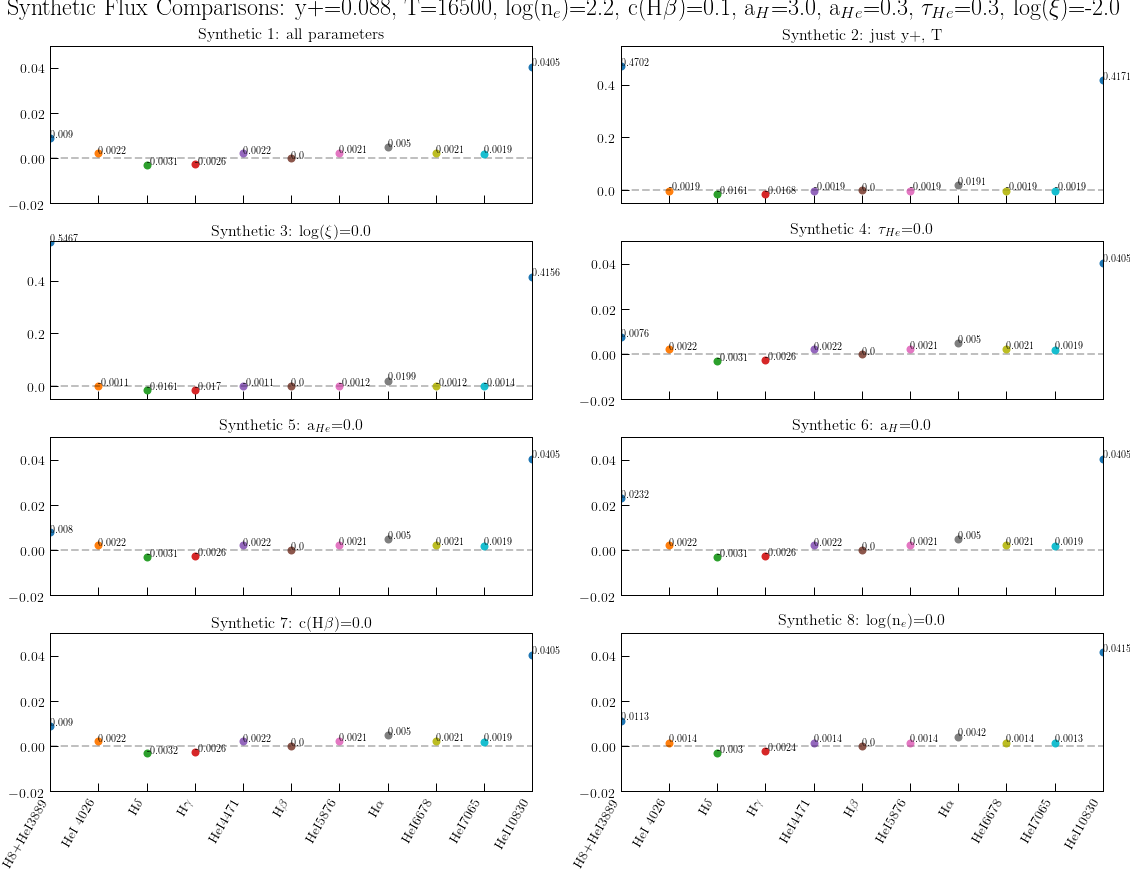

In [14]:
f, ax = plt.subplots(4,2, figsize=(16, 12), sharex=True)

for c in range(1, len(erik.colnames)):
    col = erik.colnames[c]
    ax[0,0].plot(c, (erik[col][0]-A2002[col][0])/A2002[col][0], marker='o', markersize=8)
    ax[0,0].text(c, (erik[col][0]-A2002[col][0])/A2002[col][0], str(round((erik[col][0]-A2002[col][0])/A2002[col][0], 4)))
    ax[0,0].axhline(0.0, color='black', alpha=0.025, ls='--')
    ax[0,0].set_xticks(np.arange(1, len(erik.colnames), 1))
    ax[0,0].set_title('Synthetic 1: all parameters')
    ax[0,0].set_ylim(-0.02, 0.05)
    ax[0,1].plot(c, (erik[col][1]-A2002[col][1])/A2002[col][1], marker='o', markersize=8)
    ax[0,1].text(c, (erik[col][1]-A2002[col][1])/A2002[col][1], str(round((erik[col][1]-A2002[col][1])/A2002[col][1], 4)))
    ax[0,1].axhline(0.0, color='black', alpha=0.025, ls='--')
    ax[0,1].set_xticks(np.arange(1, len(erik.colnames), 1))
    ax[0,1].set_title('Synthetic 2: just y+, T')
    ax[0,1].set_ylim(-0.05, 0.55)
    ax[1,0].plot(c, (erik[col][2]-A2002[col][2])/A2002[col][2], marker='o', markersize=8)
    ax[1,0].text(c, (erik[col][2]-A2002[col][2])/A2002[col][2], str(round((erik[col][2]-A2002[col][2])/A2002[col][2], 4)))
    ax[1,0].axhline(0.0, color='black', alpha=0.025, ls='--')
    ax[1,0].set_xticks(np.arange(1, len(erik.colnames), 1))
    ax[1,0].set_title(r'Synthetic 3: log($\xi$)=0.0')
    ax[1,0].set_ylim(-0.05, 0.55)
    ax[1,1].plot(c, (erik[col][3]-A2002[col][3])/A2002[col][3], marker='o', markersize=8)
    ax[1,1].text(c, (erik[col][3]-A2002[col][3])/A2002[col][3], str(round((erik[col][3]-A2002[col][3])/A2002[col][3], 4)))
    ax[1,1].axhline(0.0, color='black', alpha=0.025, ls='--')
    ax[1,1].set_xticks(np.arange(1, len(erik.colnames), 1))
    ax[1,1].set_title(r'Synthetic 4: $\tau_{He}$=0.0')
    ax[1,1].set_ylim(-0.02, 0.05)
    ax[2,0].plot(c, (erik[col][4]-A2002[col][4])/A2002[col][4], marker='o', markersize=8)
    ax[2,0].text(c, (erik[col][4]-A2002[col][4])/A2002[col][4], str(round((erik[col][4]-A2002[col][4])/A2002[col][4], 4)))
    ax[2,0].axhline(0.0, color='black', alpha=0.025, ls='--')
    ax[2,0].set_xticks(np.arange(1, len(erik.colnames), 1))
    ax[2,0].set_title(r'Synthetic 5: a$_{He}$=0.0')
    ax[2,0].set_ylim(-0.02, 0.05)
    ax[2,1].plot(c, (erik[col][5]-A2002[col][5])/A2002[col][5], marker='o', markersize=8)
    ax[2,1].text(c, (erik[col][5]-A2002[col][5])/A2002[col][5], str(round((erik[col][5]-A2002[col][5])/A2002[col][5], 4)))
    ax[2,1].axhline(0.0, color='black', alpha=0.025, ls='--')
    ax[2,1].set_xticks(np.arange(1, len(erik.colnames), 1))
    ax[2,1].set_title(r'Synthetic 6: a$_{H}$=0.0')
    ax[2,1].set_ylim(-0.02, 0.05)
    ax[3,0].plot(c, (erik[col][6]-A2002[col][6])/A2002[col][6], marker='o', markersize=8)
    ax[3,0].text(c, (erik[col][6]-A2002[col][6])/A2002[col][6], str(round((erik[col][6]-A2002[col][6])/A2002[col][6], 4)))
    ax[3,0].axhline(0.0, color='black', alpha=0.025, ls='--')
    ax[3,0].set_xticks(np.arange(1, len(erik.colnames), 1))
    ax[3,0].set_title(r'Synthetic 7: c(H$\beta$)=0.0')
    ax[3,0].set_ylim(-0.02, 0.05)
    ax[3,0].set_xticklabels(['H8+HeI3889','HeI 4026', r'H$\delta$',r'H$\gamma$','HeI4471', \
                            r'H$\beta$', 'HeI5876',r'H$\alpha$','HeI6678','HeI7065','HeI10830'], rotation=60, ha='right')
    ax[3,1].plot(c, (erik[col][7]-A2002[col][7])/A2002[col][7], marker='o', markersize=8)
    ax[3,1].text(c, (erik[col][7]-A2002[col][7])/A2002[col][7], str(round((erik[col][7]-A2002[col][7])/A2002[col][7], 4)))
    ax[3,1].axhline(0.0, color='black', alpha=0.025, ls='--')
    ax[3,1].set_xticks(np.arange(1, len(erik.colnames), 1))
    ax[3,1].set_title(r'Synthetic 8: log(n$_{e}$)=0.0')
    ax[3,1].set_ylim(-0.02, 0.05)
    ax[3,1].set_xticklabels(['H8+HeI3889','HeI 4026', r'H$\delta$',r'H$\gamma$','HeI4471', \
                            r'H$\beta$', 'HeI5876',r'H$\alpha$','HeI6678','HeI7065','HeI10830'], rotation=60, ha='right')
f.suptitle(r'Synthetic Flux Comparisons: y+=0.088, T=16500, log(n$_{e}$)=2.2, c(H$\beta$)=0.1, a$_{H}$=3.0, a$_{He}$=0.3, $\tau_{He}$=0.3, log($\xi$)=-2.0', y=1.02, fontsize=24)
f.savefig('/Users/thsyu/Software/Yp/test_data/synthetic/synthetic_flux-A2002comparison.pdf', overwrite=True)
f.show()

# Putting synthetic runs into one table

In [4]:
s1 = Table.read('/Users/thsyu/Software/Yp/test_data/synthetic/synthetic1_A2002', format='ascii', delimiter=' ')
s2 = Table.read('/Users/thsyu/Software/Yp/test_data/synthetic/synthetic2_A2002', format='ascii', delimiter=' ')
s3 = Table.read('/Users/thsyu/Software/Yp/test_data/synthetic/synthetic3_A2002', format='ascii', delimiter=' ')
s4 = Table.read('/Users/thsyu/Software/Yp/test_data/synthetic/synthetic4_A2002', format='ascii', delimiter=' ')
s5 = Table.read('/Users/thsyu/Software/Yp/test_data/synthetic/synthetic5_A2002', format='ascii', delimiter=' ')
s6 = Table.read('/Users/thsyu/Software/Yp/test_data/synthetic/synthetic6_A2002', format='ascii', delimiter=' ')
s7 = Table.read('/Users/thsyu/Software/Yp/test_data/synthetic/synthetic7_A2002', format='ascii', delimiter=' ')
s8 = Table.read('/Users/thsyu/Software/Yp/test_data/synthetic/synthetic8_A2002', format='ascii', delimiter=' ')

data = np.array([(s1['Flux Ratio']), (s2['Flux Ratio']), (s3['Flux Ratio']), (s4['Flux Ratio']), 
                 (s5['Flux Ratio']), (s6['Flux Ratio']), (s7['Flux Ratio']), (s8['Flux Ratio']) ])
tbl = Table(rows=data, names=('H8+HeI3889','HeI4026','Hd4102','Hg4340','HeI4471',\
      'Hb4861','HeI5876','Ha6563','HeI6678','HeI7065','HeI10830'))
tbl.write('/Users/thsyu/Software/Yp/test_data/synthetic/synthetic_A2002', format='ascii', delimiter=' ', overwrite=True)

# Recovering input params from Erik's synthetic fluxes

In [4]:
ndim = 8
onevar = -1

nwalkers = 500
nmbr = 1000
burnin = int(0.8*nmbr) #int(0.1*nmbr)

esyn1 = np.load('/Users/thsyu/Software/Yp/test_data/synthetic/synthetic1_500walkers_1000steps.npy')
syn1 = esyn1[:, burnin:, :].reshape((-1, ndim))
esyn2 = np.load('/Users/thsyu/Software/Yp/test_data/synthetic/synthetic2_500walkers_1000steps.npy')
syn2 = esyn2[:, burnin:, :].reshape((-1, ndim))
esyn3 = np.load('/Users/thsyu/Software/Yp/test_data/synthetic/synthetic3_500walkers_1000steps.npy')
syn3 = esyn3[:, burnin:, :].reshape((-1, ndim))
esyn4 = np.load('/Users/thsyu/Software/Yp/test_data/synthetic/synthetic4_500walkers_1000steps.npy')
syn4 = esyn4[:, burnin:, :].reshape((-1, ndim))
esyn5 = np.load('/Users/thsyu/Software/Yp/test_data/synthetic/synthetic5_500walkers_1000steps.npy')
syn5 = esyn5[:, burnin:, :].reshape((-1, ndim))
esyn6 = np.load('/Users/thsyu/Software/Yp/test_data/synthetic/synthetic6_500walkers_1000steps.npy')
syn6 = esyn6[:, burnin:, :].reshape((-1, ndim))
esyn7 = np.load('/Users/thsyu/Software/Yp/test_data/synthetic/synthetic7_500walkers_1000steps.npy')
syn7 = esyn7[:, burnin:, :].reshape((-1, ndim))
esyn8 = np.load('/Users/thsyu/Software/Yp/test_data/synthetic/synthetic8_500walkers_1000steps.npy')
syn8 = esyn8[:, burnin:, :].reshape((-1, ndim))

In [7]:
y_plus_syn1, temp_syn1, log_dens_syn1, c_Hb_syn1, a_H_syn1, a_He_syn1, tau_He_syn1, log_xi_syn1 = map(
    lambda v: (v[1], v[2] - v[1], v[1] - v[0]), zip(*np.percentile(syn1, [16, 50, 84], axis=0)))
y_plus_syn2, temp_syn2, log_dens_syn2, c_Hb_syn2, a_H_syn2, a_He_syn2, tau_He_syn2, log_xi_syn2 = map(
    lambda v: (v[1], v[2] - v[1], v[1] - v[0]), zip(*np.percentile(syn2, [16, 50, 84], axis=0)))
y_plus_syn3, temp_syn3, log_dens_syn3, c_Hb_syn3, a_H_syn3, a_He_syn3, tau_He_syn3, log_xi_syn3 = map(
    lambda v: (v[1], v[2] - v[1], v[1] - v[0]), zip(*np.percentile(syn3, [16, 50, 84], axis=0)))
y_plus_syn4, temp_syn4, log_dens_syn4, c_Hb_syn4, a_H_syn4, a_He_syn4, tau_He_syn4, log_xi_syn4 = map(
    lambda v: (v[1], v[2] - v[1], v[1] - v[0]), zip(*np.percentile(syn4, [16, 50, 84], axis=0)))
y_plus_syn5, temp_syn5, log_dens_syn5, c_Hb_syn5, a_H_syn5, a_He_syn5, tau_He_syn5, log_xi_syn5 = map(
    lambda v: (v[1], v[2] - v[1], v[1] - v[0]), zip(*np.percentile(syn5, [16, 50, 84], axis=0)))
y_plus_syn6, temp_syn6, log_dens_syn6, c_Hb_syn6, a_H_syn6, a_He_syn6, tau_He_syn6, log_xi_syn6 = map(
    lambda v: (v[1], v[2] - v[1], v[1] - v[0]), zip(*np.percentile(syn6, [16, 50, 84], axis=0)))
y_plus_syn7, temp_syn7, log_dens_syn7, c_Hb_syn7, a_H_syn7, a_He_syn7, tau_He_syn7, log_xi_syn7 = map(
    lambda v: (v[1], v[2] - v[1], v[1] - v[0]), zip(*np.percentile(syn7, [16, 50, 84], axis=0)))
y_plus_syn8, temp_syn8, log_dens_syn8, c_Hb_syn8, a_H_syn8, a_He_syn8, tau_He_syn8, log_xi_syn8 = map(
    lambda v: (v[1], v[2] - v[1], v[1] - v[0]), zip(*np.percentile(syn8, [16, 50, 84], axis=0)))

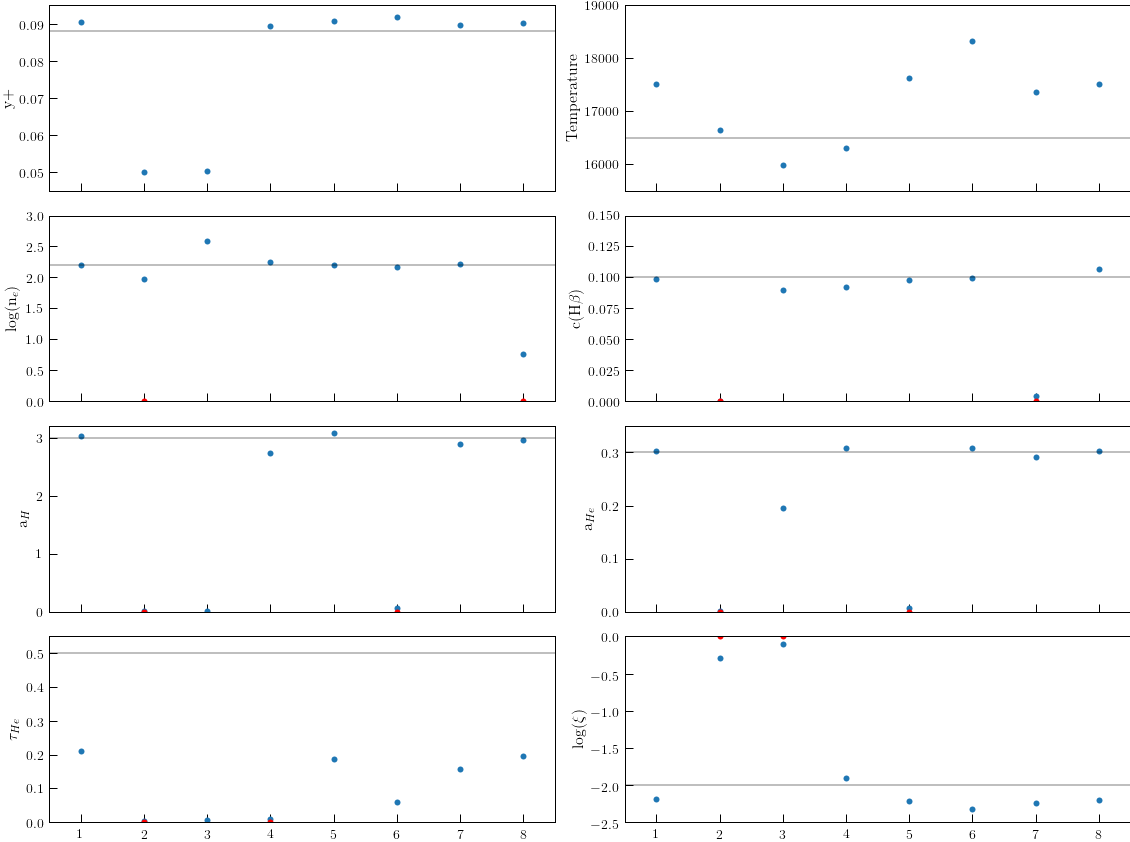

In [45]:
f, ax = plt.subplots(4,2, figsize=(16, 12), sharex=True)

ax[0,0].plot(np.linspace(1, 8, 8), np.array([y_plus_syn1[0], y_plus_syn2[0], y_plus_syn3[0], y_plus_syn4[0],
                                             y_plus_syn5[0], y_plus_syn6[0], y_plus_syn7[0], y_plus_syn8[0]]), 'o')
ax[0,0].axhline(0.088, alpha=0.25, color='black')
ax[0,0].set_xlim(0.5, 8.5)
ax[0,0].set_ylim(0.045, 0.095)
ax[0,0].set_ylabel('y+')
ax[0,1].plot(np.linspace(1, 8, 8), np.array([temp_syn1[0], temp_syn2[0], temp_syn3[0], temp_syn4[0],
                                             temp_syn5[0], temp_syn6[0], temp_syn7[0], temp_syn8[0]]), 'o')
ax[0,1].axhline(16500, alpha=0.25, color='black')
ax[0,1].set_xlim(0.5, 8.5)
ax[0,1].set_ylim(15500, 19000)
ax[0,1].set_ylabel('Temperature')
ax[1,0].plot(np.linspace(1, 8, 8), np.array([log_dens_syn1[0], log_dens_syn2[0], log_dens_syn3[0], log_dens_syn4[0],
                                             log_dens_syn5[0], log_dens_syn6[0], log_dens_syn7[0], log_dens_syn8[0]]), 'o')
ax[1,0].plot(2, 0.0, 'o', color='red')
ax[1,0].plot(8, 0.0, 'o', color='red')
ax[1,0].axhline(2.2, alpha=0.25, color='black')
ax[1,0].set_xlim(0.5, 8.5)
ax[1,0].set_ylim(0.0, 3.0)
ax[1,0].set_ylabel(r'log(n$_{e}$)')
ax[1,1].plot(np.linspace(1, 8, 8), np.array([c_Hb_syn1[0], c_Hb_syn2[0], c_Hb_syn3[0], c_Hb_syn4[0],
                                             c_Hb_syn5[0], c_Hb_syn6[0], c_Hb_syn7[0], c_Hb_syn8[0]]), 'o')
ax[1,1].plot(2, 0.0, 'o', color='red')
ax[1,1].plot(7, 0.0, 'o', color='red')
ax[1,1].axhline(0.1, alpha=0.25, color='black')
ax[1,1].set_xlim(0.5, 8.5)
ax[1,1].set_ylim(0.0, 0.15)
ax[1,1].set_ylabel(r'c(H$\beta$)')
ax[2,0].plot(np.linspace(1, 8, 8), np.array([a_H_syn1[0], a_H_syn2[0], a_H_syn3[0], a_H_syn4[0],
                                             a_H_syn5[0], a_H_syn6[0], a_H_syn7[0], a_H_syn8[0]]), 'o')
ax[2,0].plot(2, 0.0, 'o', color='red')
ax[2,0].plot(6, 0.0, 'o', color='red')
ax[2,0].axhline(3.0, alpha=0.25, color='black')
ax[2,0].set_xlim(0.5, 8.5)
ax[2,0].set_ylim(0.0, 3.2)
ax[2,0].set_ylabel(r'a$_{H}$')
ax[2,1].plot(np.linspace(1, 8, 8), np.array([a_He_syn1[0], a_He_syn2[0], a_He_syn3[0], a_He_syn4[0],
                                             a_He_syn5[0], a_He_syn6[0], a_He_syn7[0], a_He_syn8[0]]), 'o')
ax[2,1].plot(2, 0.0, 'o', color='red')
ax[2,1].plot(5, 0.0, 'o', color='red')
ax[2,1].axhline(0.3, alpha=0.25, color='black')
ax[2,1].set_xlim(0.5, 8.5)
ax[2,1].set_ylim(0.0, 0.35)
ax[2,1].set_ylabel(r'a$_{He}$')
ax[3,0].plot(np.linspace(1, 8, 8), np.array([tau_He_syn1[0], tau_He_syn2[0], tau_He_syn3[0], tau_He_syn4[0],
                                             tau_He_syn5[0], tau_He_syn6[0], tau_He_syn7[0], tau_He_syn8[0]]), 'o')
ax[3,0].plot(2, 0.0, 'o', color='red')
ax[3,0].plot(4, 0.0, 'o', color='red')
ax[3,0].axhline(0.5, alpha=0.25, color='black')
ax[3,0].set_xlim(0.5, 8.5)
ax[3,0].set_ylim(0.0, 0.55)
ax[3,0].set_ylabel(r'$\tau_{He}$')
ax[3,1].plot(np.linspace(1, 8, 8), np.array([log_xi_syn1[0], log_xi_syn2[0], log_xi_syn3[0], log_xi_syn4[0],
                                             log_xi_syn5[0], log_xi_syn6[0], log_xi_syn7[0], log_xi_syn8[0]]), 'o')
ax[3,1].plot(2, 0.0, 'o', color='red')
ax[3,1].plot(3, 0.0, 'o', color='red')
ax[3,1].axhline(-2.0, alpha=0.25, color='black')
ax[3,1].set_xlim(0.5, 8.5)
ax[3,1].set_ylim(-2.5, 0.0)
ax[3,1].set_ylabel(r'log($\xi$)')

f.savefig('/Users/thsyu/Dropbox/BCDs/primordial_helium/eriks_synthetic_recovered.pdf', overwrite=True)
f.show()

# Erik's Synthetic Fluxes into MCMC input

In [2]:
erik = Table.read('SyntheticFluxes.DAT', format='ascii', delimiter='\t')

In [3]:
for i in range(len(erik)):
    targ_table = Table()
    targ_table['Wavelength'] = Column([3890.166, 4027.328, 4102.891, 4341.684, 4472.755, 4862.721, 5877.299, 6564.612, 6679.994, 7067.198, 10833.306, 10941.082])
    targ_table['Species'] = Column(['hydrogen+helium', 'helium', 'hydrogen', 'hydrogen', 'helium', 'hydrogen', 'helium', 'hydrogen', 'helium', 'helium', 'helium', 'hydrogen'])
    targ_table['Flux Ratio'] = Column([float(erik[i]['H8+HeI3889']), float(erik[i]['HeI4026']), float(erik[i]['Hd4102']), float(erik[i]['Hg4340']), 
                                       float(erik[i]['HeI4471']), float(erik[i]['Hb4861']), float(erik[i]['HeI5876']), float(erik[i]['Ha6563']),
                                       float(erik[i]['HeI6678']), float(erik[i]['HeI7065']), float(erik[i]['HeI10830']), float(0.0)])
    targ_table['EW'] = Column([22.0, 2.0, 30.0, 70.0, 6.0, 200.0, 34.0, 1150.0, 12.0, 12.0, 380.0, 160.0])
    targ_table.write('/Users/thsyu/Software/Yp/test_data/synthetic/synthetic' + str(i+1) + '_erik', format='ascii', overwrite=True)

NameError: name 'Column' is not defined